In [25]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\91914\\Downloads\\diabetes_prediction_dataset.csv.zip")

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [7]:
df.shape

(100000, 9)

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [12]:
df.select_dtypes(include = 'object').nunique()

gender             3
smoking_history    6
dtype: int64

# EDA of categorical variables

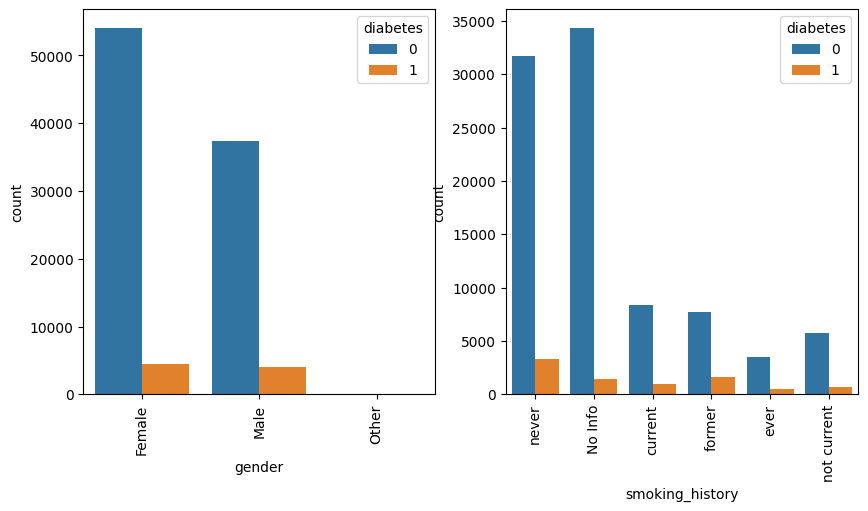

In [24]:
# list of categorical variables
cat_vars = ["gender","smoking_history"]

# create fig with subplots
fig, axs = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
#axs = axs.flatten()

# create a bar plot for catgorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x = var,hue = "diabetes",data = df,ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation = 90)
#fig.tight_layout()

plt.show()

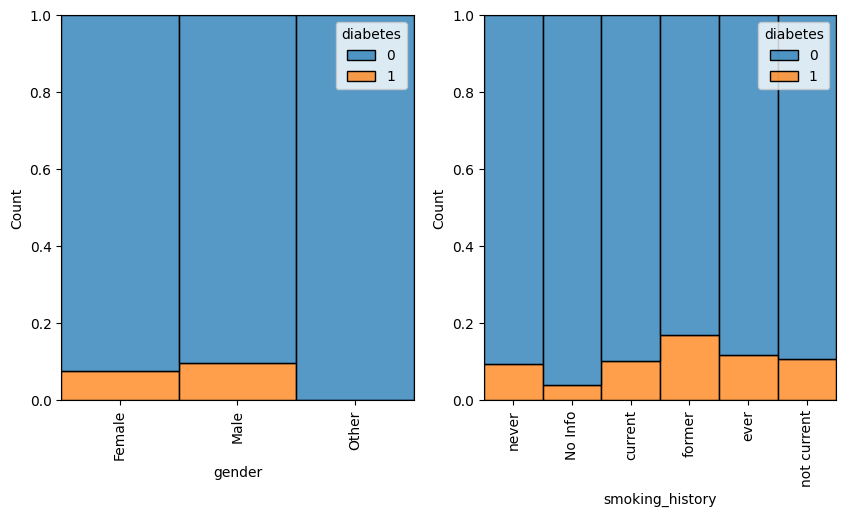

In [35]:
# list of categorical variables
cat_vars = ["gender","smoking_history"]

# create fig with subplots
fig, axs = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
#axs = axs.flatten()

# create a bar plot for catgorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x = var,hue = "diabetes",data = df,ax = axs[i],multiple = "fill")
    axs[i].set_xticklabels(df[var].unique(),rotation = 90)
    #axs[i].set_xlabel(var)
#fig.tight_layout()

plt.show()

# EDA for numerical variable

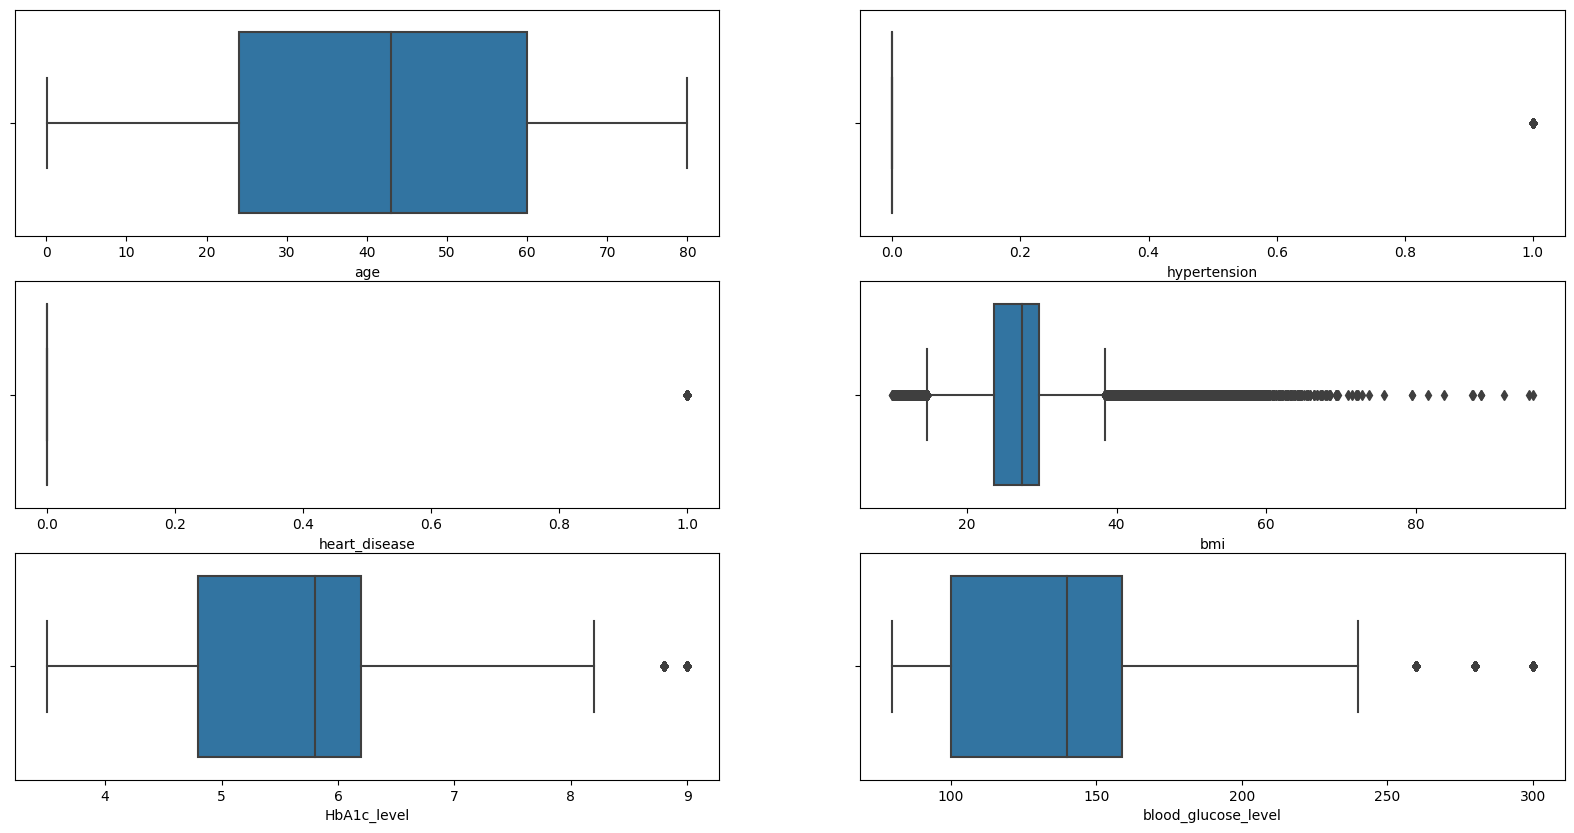

In [46]:
num_vars = ["age","hypertension","heart_disease","bmi","HbA1c_level","blood_glucose_level"]
fig, axs = plt.subplots(nrows = 3,ncols = 2,figsize = (20,10))
axs = axs.flatten()

for i,var in enumerate(num_vars):
    sns.boxplot(x = var,data = df,ax =axs[i])
    
plt.show()
    

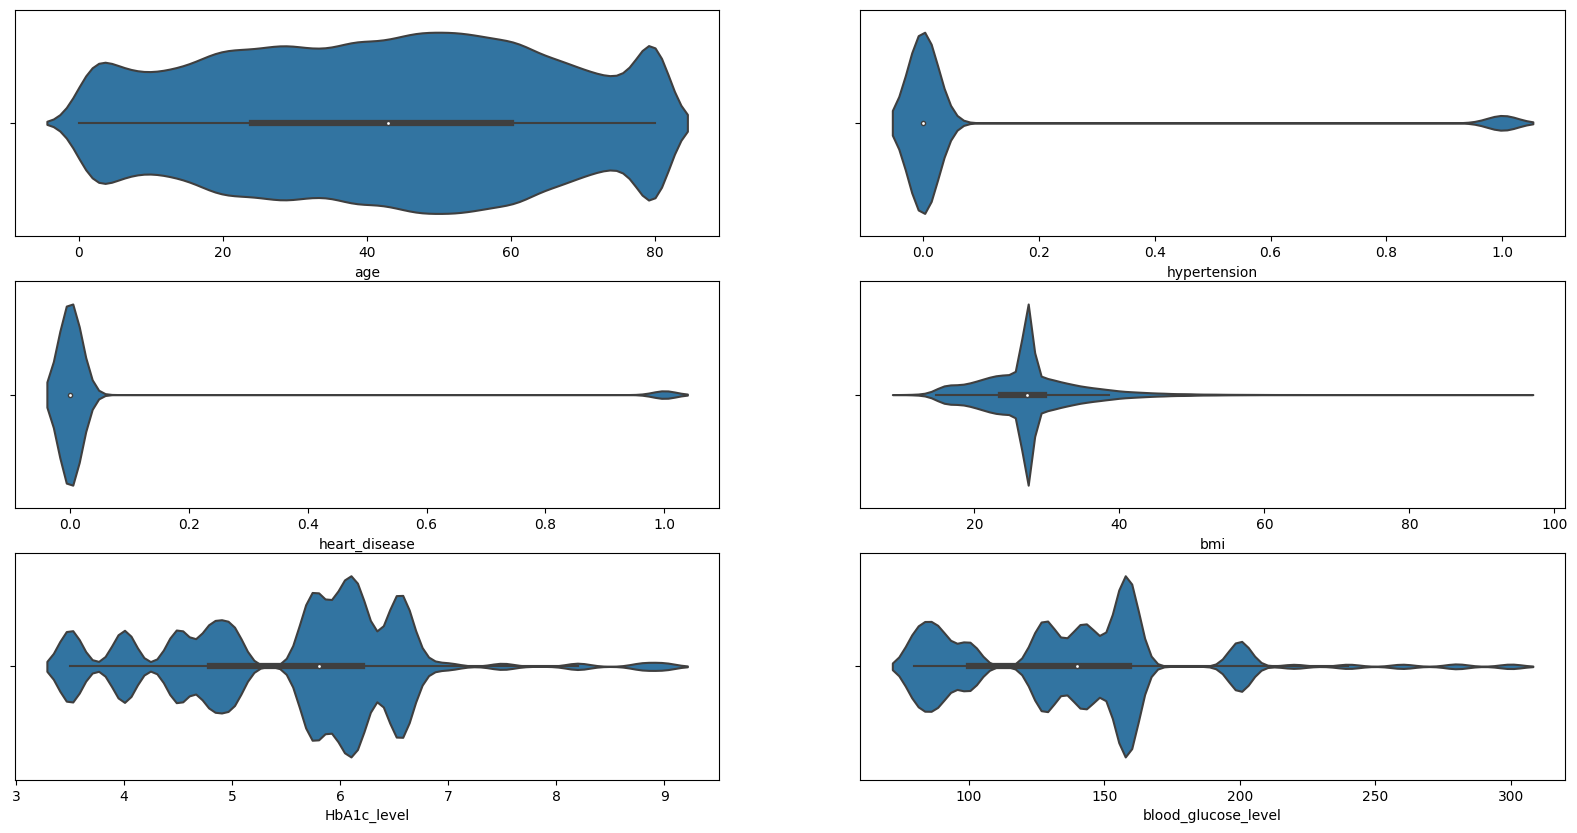

In [45]:
num_vars = ["age","hypertension","heart_disease","bmi","HbA1c_level","blood_glucose_level"]
fig, axs = plt.subplots(nrows = 3,ncols = 2,figsize = (20,10))
axs = axs.flatten()

for i,var in enumerate(num_vars):
    sns.violinplot(x = var,data = df,ax =axs[i])
    
plt.show()

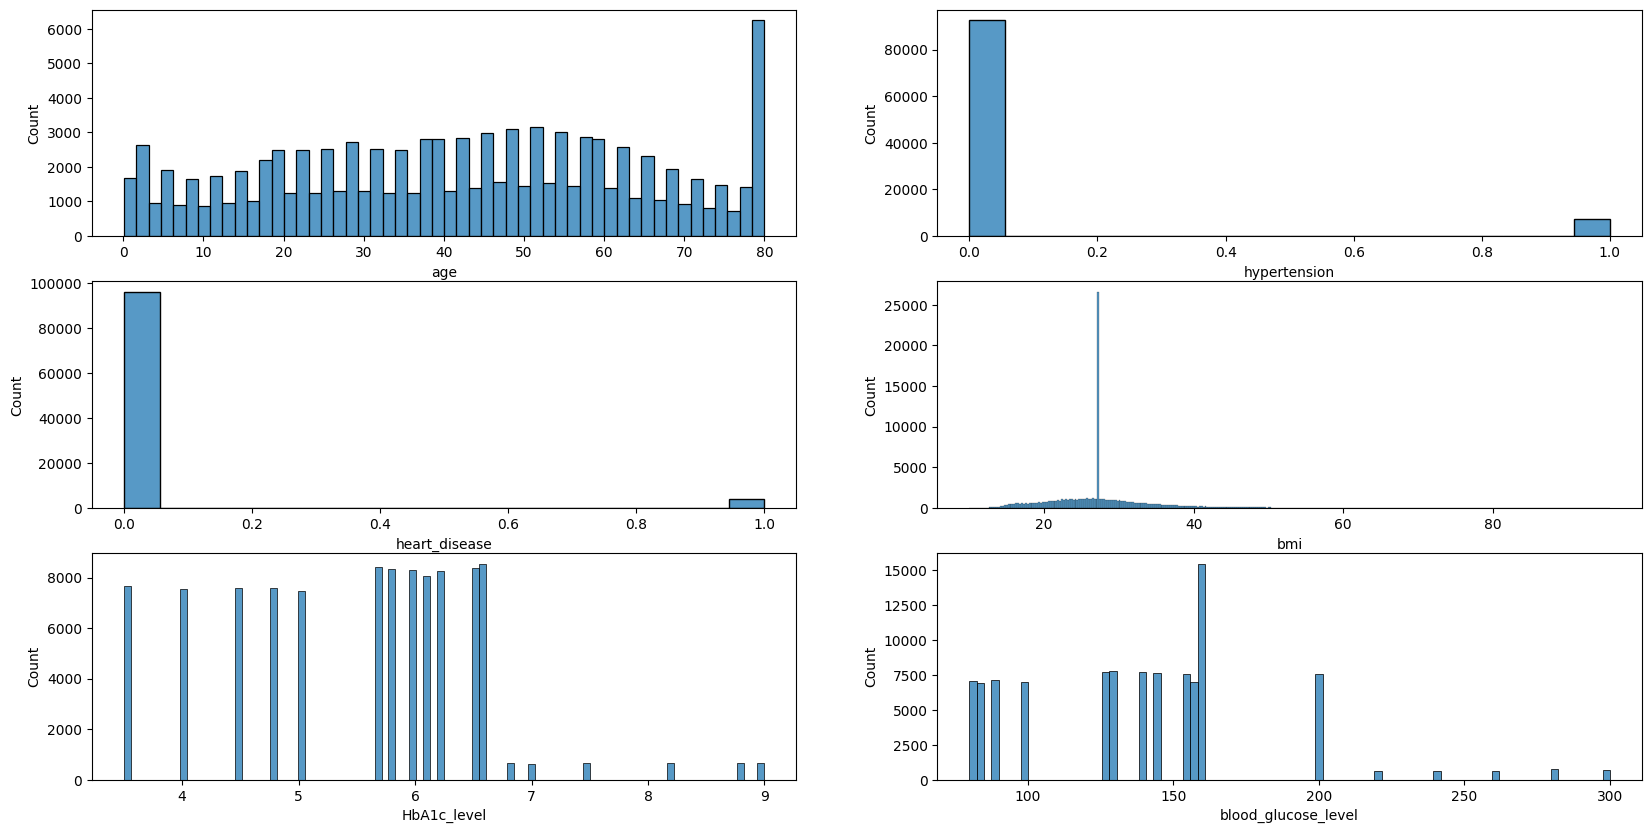

In [47]:
num_vars = ["age","hypertension","heart_disease","bmi","HbA1c_level","blood_glucose_level"]
fig, axs = plt.subplots(nrows = 3,ncols = 2,figsize = (20,10))
axs = axs.flatten()

for i,var in enumerate(num_vars):
    sns.histplot(x = var,data = df,ax =axs[i])
    
plt.show()

# Label encode each categorical columns

In [51]:
for col in df.select_dtypes(include = ['object']).columns:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male' 'Other']
smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()
for col in df.select_dtypes(include = ['object']).columns:
    le.fit(df[col].unique())
    df[col] = le.transform(df[col])
    print(f"{col}: {df[col].unique()}")

gender: [0 1 2]
smoking_history: [4 0 1 3 2 5]


# Check the target value "Diabetes" is balanced or not

In [83]:
df["diabetes"].unique()

array([0, 1], dtype=int64)

<AxesSubplot: ylabel='count'>

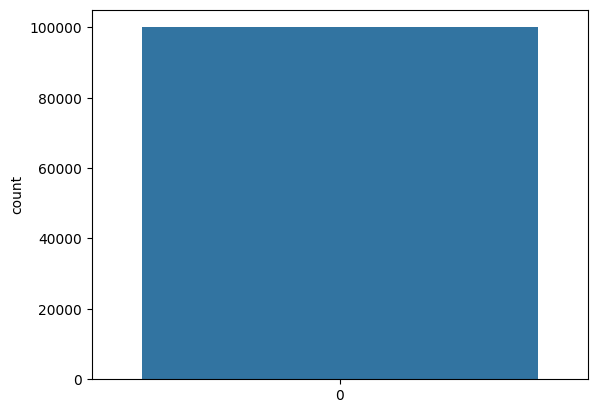

In [78]:
df["diabetes"].value_counts()
sns.countplot(df["diabetes"])

In [60]:
from imblearn.under_sampling import RandomUnderSampler

In [62]:
rus = RandomUnderSampler()
X = df.drop("diabetes",axis = 1)
y = df["diabetes"]
X_resampled, y_resampled = rus.fit_resample(X,y)
df_resampled = pd.concat([X_resampled,y_resampled],axis = 1)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,12.0,0,0,0,27.32,4.8,160,0
1,1,52.0,0,0,5,27.34,4.5,145,0
2,0,53.0,0,0,1,25.69,5.7,80,0
3,0,54.0,0,0,2,25.34,5.7,126,0
4,0,28.0,0,0,1,19.93,6.2,130,0
...,...,...,...,...,...,...,...,...,...
16995,0,65.0,1,1,4,33.55,8.2,140,1
16996,1,55.0,0,1,3,30.42,6.2,300,1
16997,0,61.0,0,0,0,34.45,6.5,280,1
16998,0,58.0,1,0,4,38.31,7.0,200,1


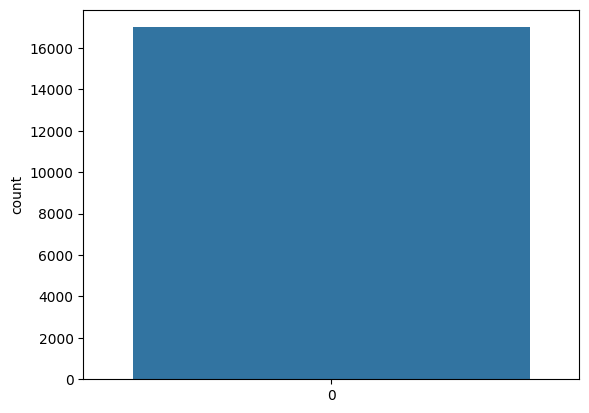

In [87]:
sns.countplot(df_resampled["diabetes"])
df_resampled["diabetes"].value_counts()

In [64]:
df_resampled

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,12.0,0,0,0,27.32,4.8,160,0
1,1,52.0,0,0,5,27.34,4.5,145,0
2,0,53.0,0,0,1,25.69,5.7,80,0
3,0,54.0,0,0,2,25.34,5.7,126,0
4,0,28.0,0,0,1,19.93,6.2,130,0
...,...,...,...,...,...,...,...,...,...
16995,0,65.0,1,1,4,33.55,8.2,140,1
16996,1,55.0,0,1,3,30.42,6.2,300,1
16997,0,61.0,0,0,0,34.45,6.5,280,1
16998,0,58.0,1,0,4,38.31,7.0,200,1


In [68]:
from scipy import stats
import numpy as np


In [75]:
def remove_outliers(df_resampled,cols,treshold = 3):
    for col in cols:
        z = np.abs(stats.zscore(df_resampled[col]))
        df_resampled = df_resampled[(z > treshold|df_resampled[col].isnull() )]
    return df_resampled

In [76]:
select_cols = ["bmi","HbA1c_level","blood_glucose_level"]
df_clean = remove_outliers(df_resampled,select_cols)
df_clean.shape

(498, 9)

In [77]:
df_clean

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,0,67.0,1,0,3,41.23,4.8,85,0
64,1,77.0,0,0,3,40.94,4.8,100,0
78,0,51.0,0,0,1,43.48,4.5,80,0
116,1,1.4,0,0,0,21.87,4.5,80,0
134,0,43.0,0,0,4,21.05,4.5,90,0
...,...,...,...,...,...,...,...,...,...
16909,0,60.0,0,0,1,40.18,9.0,300,1
16916,1,61.0,1,0,3,46.50,8.8,280,1
16926,0,57.0,0,0,3,39.58,9.0,260,1
16962,1,71.0,0,1,5,38.16,7.5,280,1


# Heat map correlation

<AxesSubplot: >

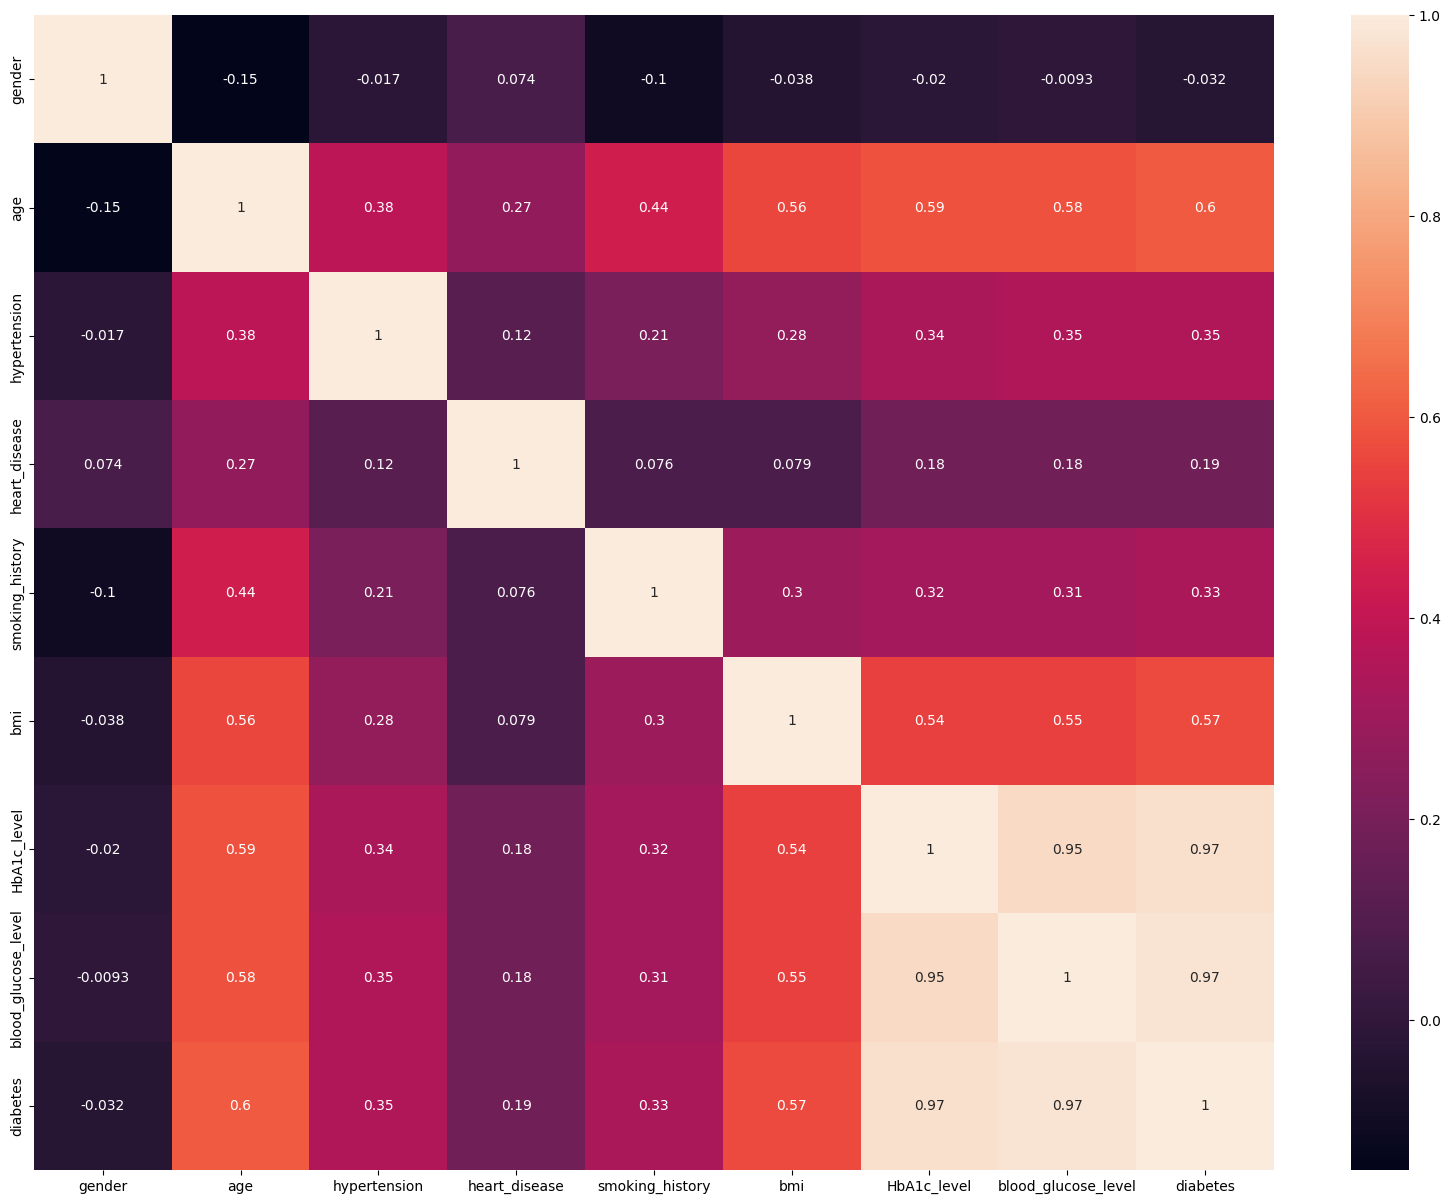

In [90]:
plt.figure(figsize = (20,15))
sns.heatmap(df_clean.corr(),fmt = '.2g',annot = True)


# Train and Test Split

In [96]:
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score


In [97]:
X = df_clean.drop("diabetes",axis =1)
y =df_clean["diabetes"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [100]:
import time
lr = LogisticRegression()
start = time.time()
lr.fit(X_train,y_train)
end = time.time()
print("Time Taken:",end-start)


Time Taken: 0.033477783203125


In [101]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [103]:
y_pred = lr.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Precision score:",precision_score(y_test,y_pred))
print("Recall score:",recall_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


In [104]:
from sklearn.metrics import confusion_matrix


In [107]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[49  0]
 [ 0 51]]


# DecisionTree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [110]:
dt = DecisionTreeClassifier()
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[2,3,4],
              "min_samples_leaf":[1,2,3,4]
              }
grid_search = GridSearchCV(dt,param_grid,cv = 5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)


{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [116]:
dt = DecisionTreeClassifier(random_state = 0,max_depth = 3,min_samples_leaf = 1,min_samples_split =2)
dt.fit(X_train,y_train)
y_predicted = dt.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Precision score:",precision_score(y_test,y_pred))
print("Recall score:",recall_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
